## Kaggle 대회 정리

### 우주왕복선 타이타닉 : 어떤 탑승객이 다른차원으로 전송되었는지 예측하라!

* 대회명 : Spaceship Titanic : Predict which passengers are transported to an alternate dimension
* 링크 : https://www.kaggle.com/competitions/spaceship-titanic

**<목차>**
1. 대회이해하기
2. EDA\#01 : 데이터체크
3. EDA\#02 : 데이터 이해(범주형)
3. **EDA\#03 : 데이터 이해(연속형)**

In [106]:
# 라이브러리 로드

# 시스템 라이브러리

# Error가 아닌 Warnning 숨김 (에러가 아닌데 버전변경됐다 정도 메시지가 붉은색으로 나와 보기 싫음)
import warnings
warnings.filterwarnings('ignore')

# 데이터 핸들링 라이브러리
import pandas as pd
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# matplolib 한글폰트 랜더링을 위한 font설정
plt.rc('font', family='AppleGothic') # MacOS
plt.rc('font', size=9)  

# seaborn 색상팔래트 사용
sns.color_palette("pastel")


%matplotlib inline

### STEP01 : 데이터 로드

In [3]:
## 경로설정
path_train = "./raw/train.csv"
path_test = "./raw/test.csv"


## pandas DataFrame으로 로드
raw_train = pd.read_csv(path_train)
raw_test = pd.read_csv(path_test)

## EDA 
* EDA의 목적은 정말로 데이터에 대한 이해를 위한 작업
* 다만, 항상 우리의 EDA 목적이 Target과 변수간 관계를 찾기위함임을 잊어서는 안됨.

### 단일변수 탐색 (연속형)

* 범주형을 살펴봤으니 연속형을 살펴봄. 마찬가지로 파악하기 쉬운 변수부터 살펴보는것이 좋음.

*한개의 연속형을 순차대로 살펴보고 이후는 모두 동일하게 진행하기 때문에 간략하게 진행함*

In [4]:
raw_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
# 변수의 기술통계치(평균, 중앙값, 최대값, 최소값, 표준편차 등을 살펴봄)
# 기술통계치의 경우 한번에 살펴볼 수 있음 (따로 봐도 상관없으나, 불편하니까 그냥 한번에 봄)
raw_train[["Age","RoomService","FoodCourt","ShoppingMall","Spa", "VRDeck"]].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### EDA 결과 : 
* Age의 경우 최고령자(max)가 79살이고 가장 어린나이가 0살이다. 단, 25%,75%가 19\~38살인이고, 50%(중앙값)이 27세인것을 볼때, 19\~38살에 가장 많이 몰려있을것이다. 0살, 79살과 같은 극단값에 의해 분포가 왜곡될 가능성이 존재함. >> 비교적 롱테일이 심한 분포는 아닐듯.
<br><br>
* 반면 RoomService,FoodCourt,ShoppingMall,Spa,VRDeck은 50%까지 대부분이 지출한돈이 0원이고 최대값과 75%의 값이 너무나 큰 차이를 보이기 때문에 굉장한 롱테일 분포일것이며, 소수의 유저(아마도 vip)위주로 사용됐을 가능성이 크다.

<이후 전략> 
* RoomService,FoodCourt,ShoppingMall,Spa,VRDeck의 대부분이 0으로 쓸모없는 노이즈(noise)를 최소화할 방법을 찾아야함 >> 파생변수 아이디어
* Age의 경우 특별히 심한 롱테일은 아닐것 같아서 극단값에 의해서 치우쳐지지 않도록 핸들링을 한번 하거나, 적절한 그룹으로 분리하면 좋을듯


*기술통계를 살펴보고 얻은 결론과 인사이트, 가설을 기반으로 실제 각 변수를 살펴보면서 검증한다*

### Age
* 변수 설명 : 탑승객의 나이 입니다. 
* 변수 타입 : 연속형(Continuos Variable)
* 탐색 방법 : 분포그래프(distplot), 박스플롯(boxplot), 기술통계치

In [23]:
# 결측치(Nan) 값 확인하기 
raw_train["Age"].isnull().sum()

179

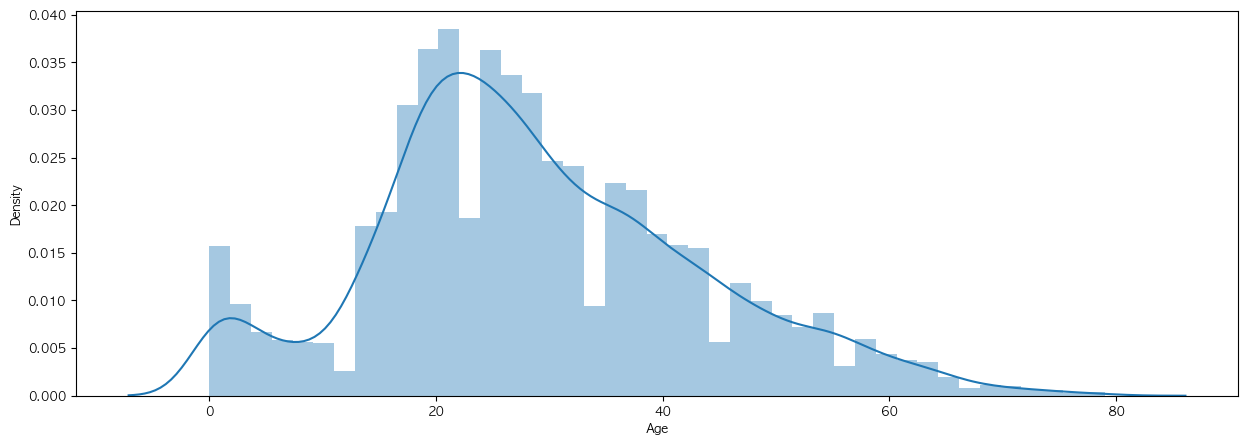

In [53]:
# 전체 분포 살펴보기
sns.distplot(raw_train["Age"])
plt.gcf().set_size_inches(15, 5)

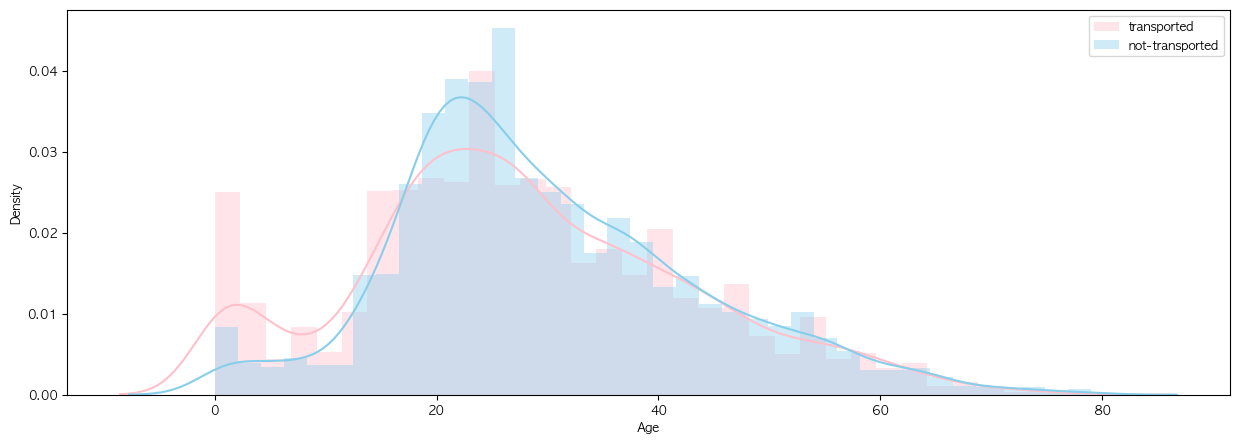

In [58]:
# 차원전송여부에 따른 Age분포를 비교해보기

transported_df = raw_train.loc[raw_train["Transported"]]
not_transported_df = raw_train.loc[~raw_train["Transported"]]

sns.distplot(transported_df["Age"], color="pink", label="transported") 
sns.distplot(not_transported_df["Age"], color="skyblue", label="not-transported") 
plt.legend()
plt.gcf().set_size_inches(15, 5)

### EDA 결과 : 
* Age의 경우 기술통계에서 살펴봤던 가설대로 크게 치우치거나 하진 않는것을 확인하였음
* 여기서 과적합을 방지하기위해 진행할 전략이 두가지로 나뉘는데, 특정 구간으로 분리하거나, 아니거나 등등 이 부분은 파생변수때 다루는것으로 한다.
* 추가로 여기서 볼록한 부분이 0세쪽이랑 20세쪽에 2개 있는데 다봉분포라고 하고 2개의 특성이 겹쳐졌을 가능성이 있다.
* 그리고 낮은 나이대에서 차원전송률이 높은 경향을 보였음, 그리고 오히려 청년층~장년층에서 전송률이 낮은 경향이 있음을 확인할 수 있음.
* 노년층의 경우 큰 차이가 없을을 확인

### RoomService,FoodCourt,ShoppingMall,Spa,VRDeck 
*데이터 설명을 보면 비슷한 변수를 칼럼으로 분리했을 뿐이고 기술통계치 검토시 동일한 틍성을 보였기 때문에 한번에 보기로함*

* 변수 설명 : 승객이 얼마나 왕복선의 럭셔리 편의시설 지불했는지 입니다.<br>
* 변수 타입 : 연속형(Continuos Variable)
* 탐색 방법 : 분포그래프(distplot), 박스플롯(boxplot), 기술통계치

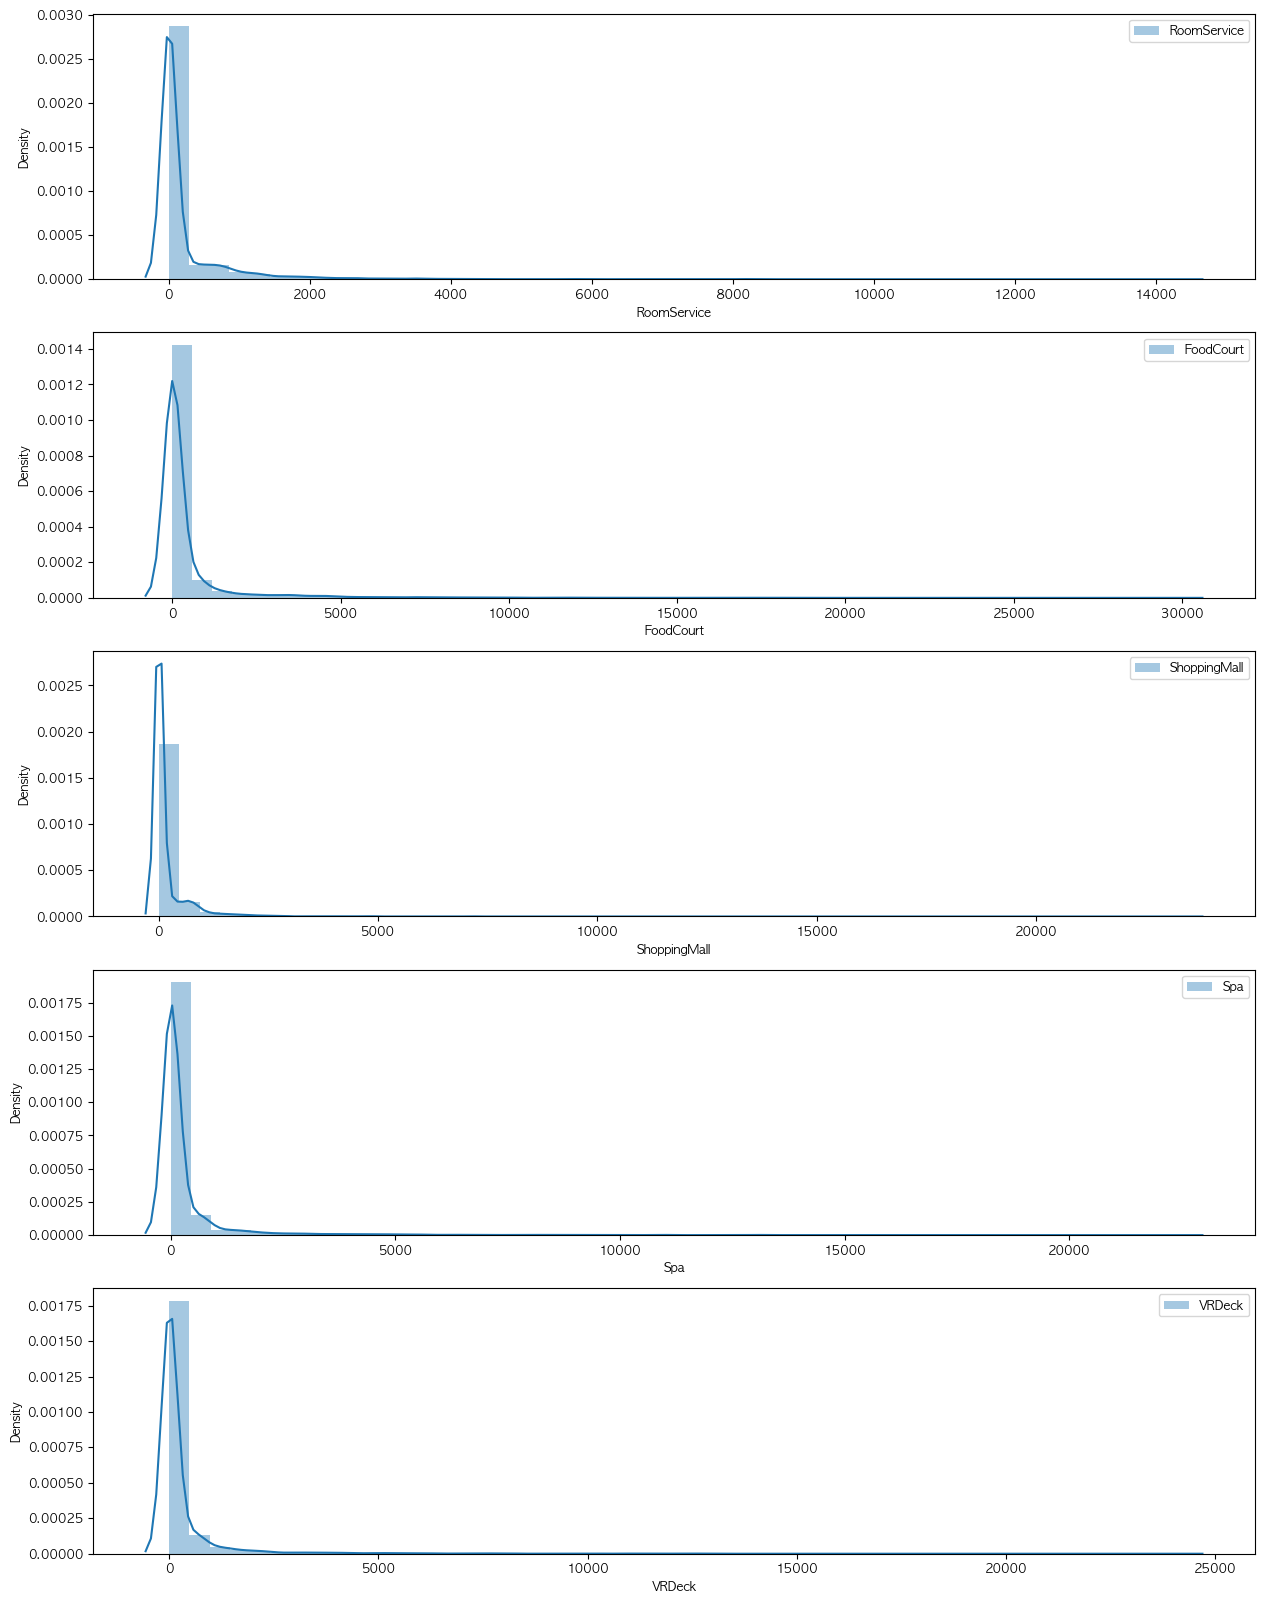

In [66]:
# 전체 분포 살펴보기
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 20))
sns.distplot(raw_train["RoomService"], ax=ax[0], label="RoomService") 
sns.distplot(raw_train["FoodCourt"], ax=ax[1], label="FoodCourt") 
sns.distplot(raw_train["ShoppingMall"], ax=ax[2], label="ShoppingMall") 
sns.distplot(raw_train["Spa"], ax=ax[3], label="Spa") 
sns.distplot(raw_train["VRDeck"], ax=ax[4], label="VRDeck") 

# 보기 헷갈리니까 범주 달아주기
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.show()

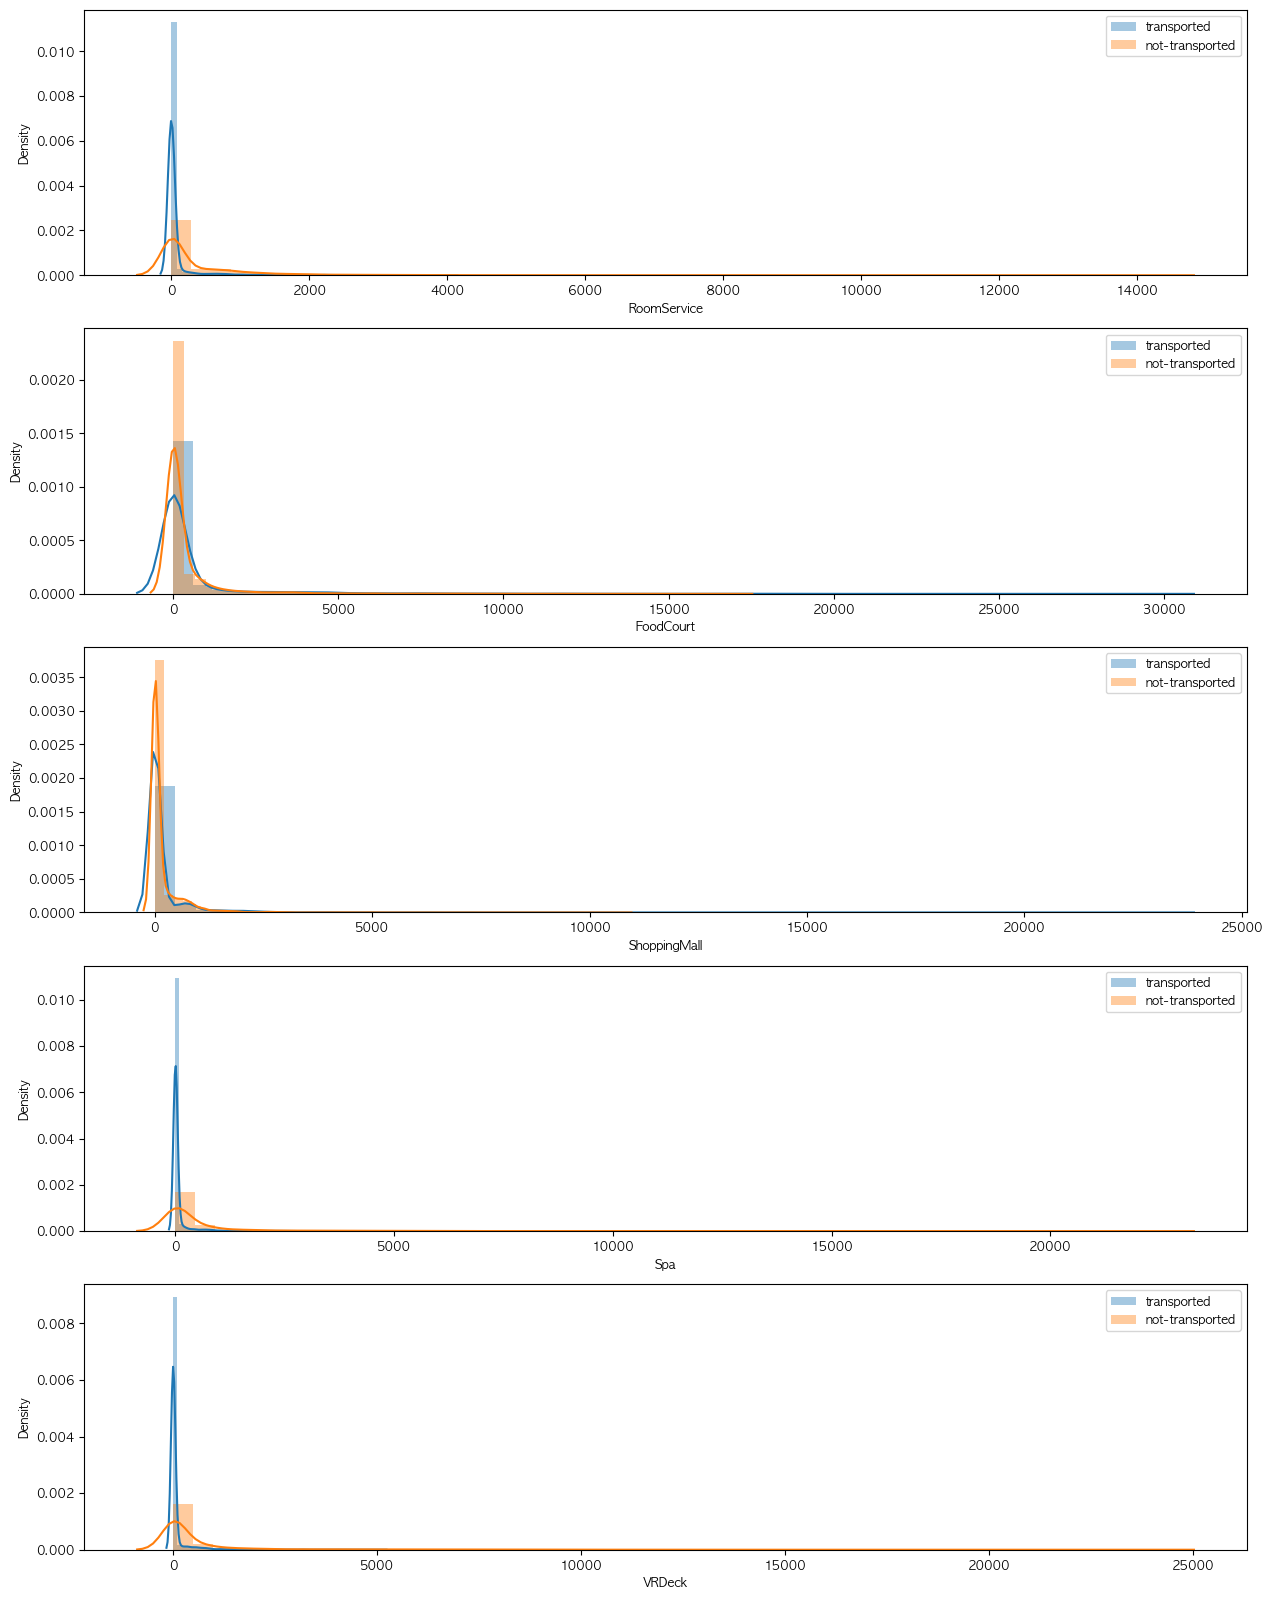

In [68]:
# 전체 분포 살펴보기
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 20))
sns.distplot(transported_df["RoomService"], ax=ax[0], label="transported") 
sns.distplot(not_transported_df["RoomService"], ax=ax[0], label="not-transported") 

sns.distplot(transported_df["FoodCourt"], ax=ax[1], label="transported") 
sns.distplot(not_transported_df["FoodCourt"], ax=ax[1], label="not-transported") 

sns.distplot(transported_df["ShoppingMall"], ax=ax[2], label="transported") 
sns.distplot(not_transported_df["ShoppingMall"], ax=ax[2], label="not-transported") 

sns.distplot(transported_df["Spa"], ax=ax[3], label="transported") 
sns.distplot(not_transported_df["Spa"], ax=ax[3], label="not-transported") 

sns.distplot(transported_df["VRDeck"], ax=ax[4], label="transported") 
sns.distplot(not_transported_df["VRDeck"], ax=ax[4], label="not-transported") 

# 보기 헷갈리니까 범주 달아주기
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.show()

*분명 어떤 특성은 있어보이는데 잘 안보기이 때문에 0인값과 그 외값을 분리해서 살펴보자*

In [85]:
# 파생변수 생성 RoomService = 0인 유저를 1로 아닌 유저를 0으로 둠
raw_train['RoomService_use']=0
raw_train.loc[raw_train["RoomService"]>0, "RoomService_use"] = 1

# 파생변수 생성 FoodCourt = 0인 유저를 1로 아닌 유저를 0으로 둠
raw_train['FoodCourt_use']=0
raw_train.loc[raw_train["FoodCourt"]>0, "FoodCourt_use"] = 1

# 파생변수 생성 ShoppingMall = 0인 유저를 1로 아닌 유저를 0으로 둠
raw_train['ShoppingMall_use']=0
raw_train.loc[raw_train["ShoppingMall"]>0, "ShoppingMall_use"] = 1

# 파생변수 생성 Spa = 0인 유저를 1로 아닌 유저를 0으로 둠
raw_train['Spa_use']=0
raw_train.loc[raw_train["Spa"]>0, "Spa_use"] = 1

# 파생변수 생성 VRDeck = 0인 유저를 1로 아닌 유저를 0으로 둠
raw_train['VRDeck_use']=0
raw_train.loc[raw_train["VRDeck"]>0, "VRDeck_use"] = 1

In [87]:
# 000_use 변수를 반영하기 위해 다시 변수할당
transported_df = raw_train.loc[raw_train["Transported"]]
not_transported_df = raw_train.loc[~raw_train["Transported"]]

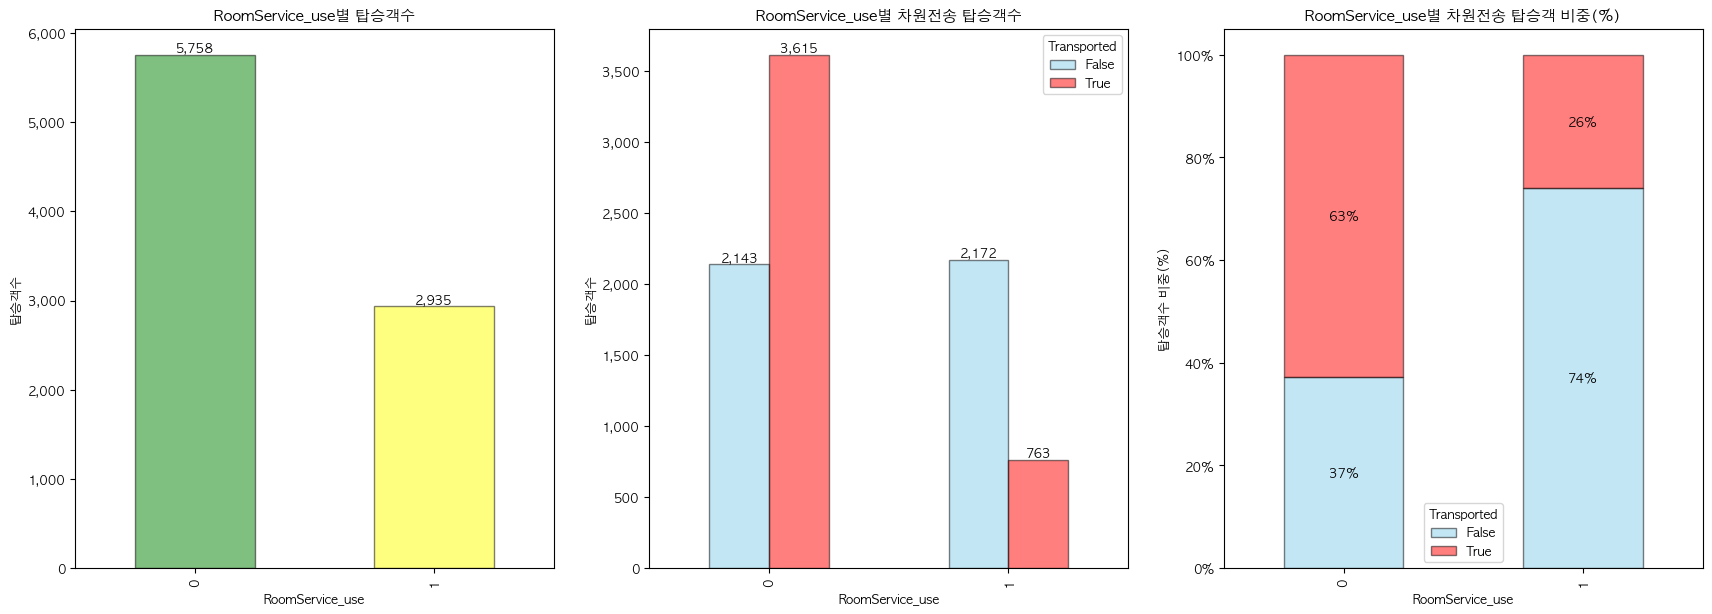

In [98]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["RoomService_use"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["RoomService_use"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["RoomService_use"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="RoomService_use별 탑승객수",
               xlabel="RoomService_use",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="RoomService_use별 차원전송 탑승객수",
                     xlabel="RoomService_use",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="RoomService_use별 차원전송 탑승객 비중(%)",
                       xlabel="RoomService_use",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

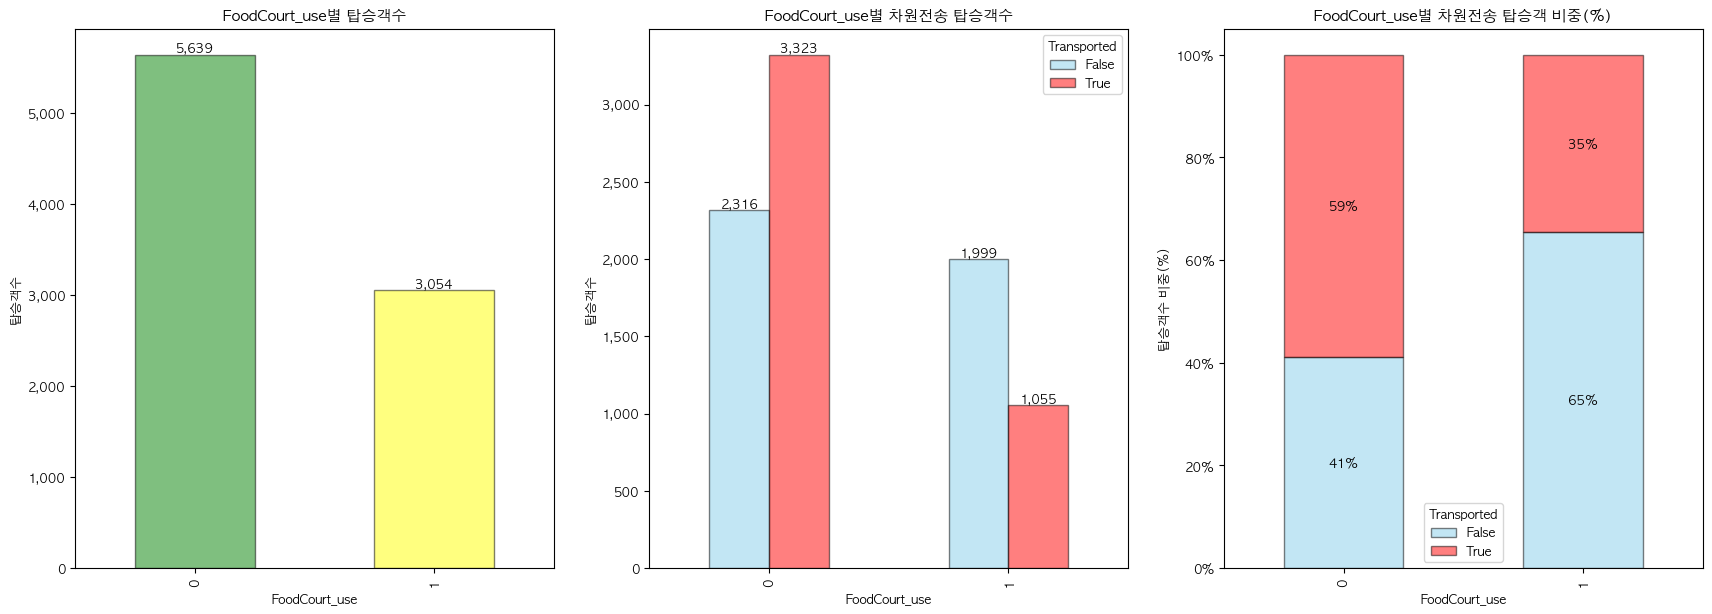

In [99]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["FoodCourt_use"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["FoodCourt_use"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["FoodCourt_use"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="FoodCourt_use별 탑승객수",
               xlabel="FoodCourt_use",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="FoodCourt_use별 차원전송 탑승객수",
                     xlabel="FoodCourt_use",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="FoodCourt_use별 차원전송 탑승객 비중(%)",
                       xlabel="FoodCourt_use",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

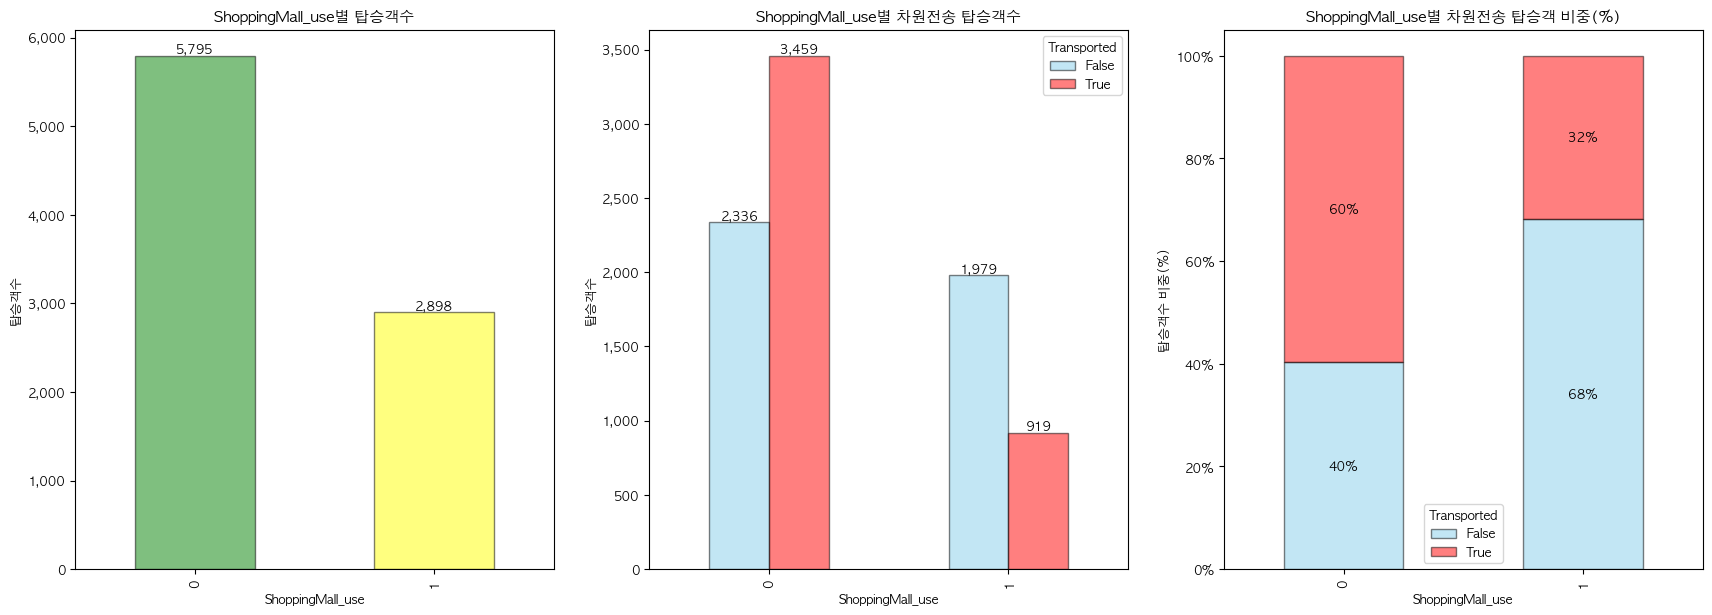

In [100]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["ShoppingMall_use"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["ShoppingMall_use"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["ShoppingMall_use"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="ShoppingMall_use별 탑승객수",
               xlabel="ShoppingMall_use",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="ShoppingMall_use별 차원전송 탑승객수",
                     xlabel="ShoppingMall_use",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="ShoppingMall_use별 차원전송 탑승객 비중(%)",
                       xlabel="ShoppingMall_use",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

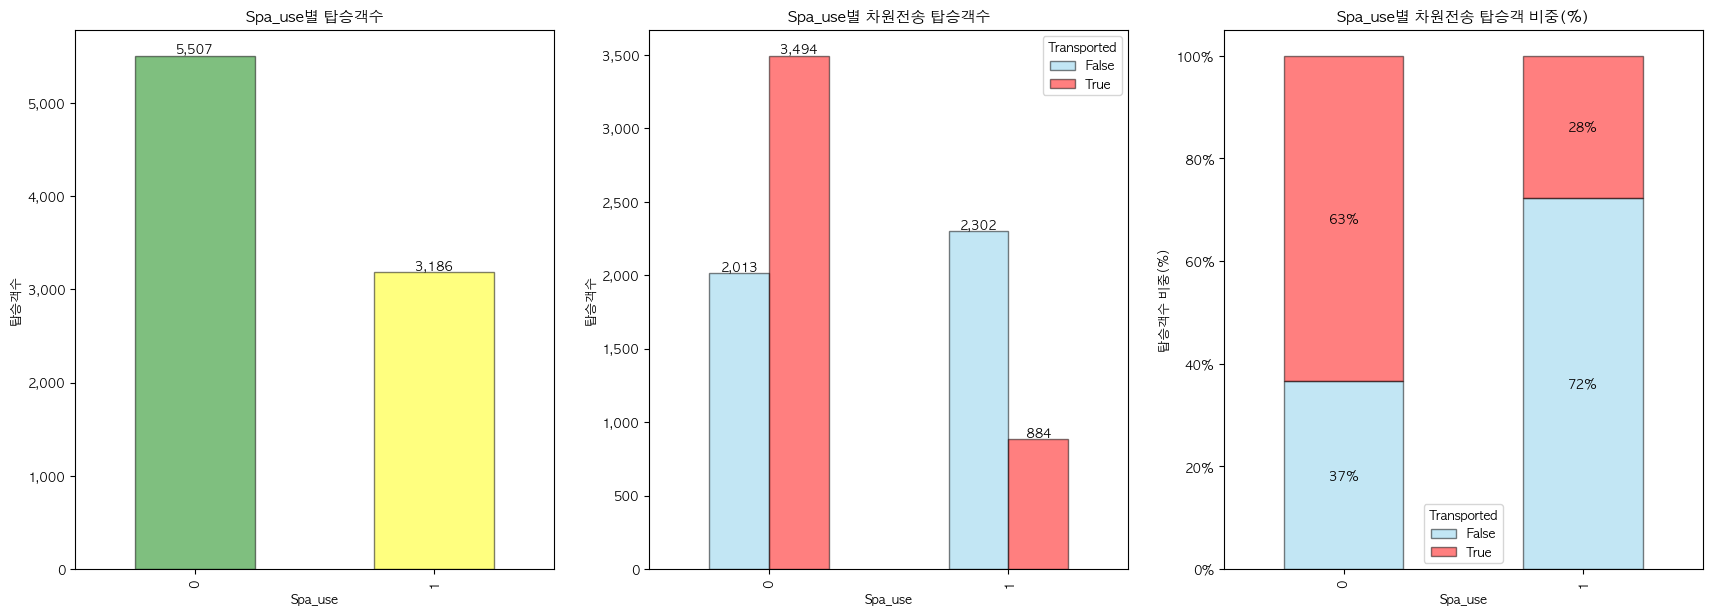

In [102]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["Spa_use"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["Spa_use"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["Spa_use"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="Spa_use별 탑승객수",
               xlabel="Spa_use",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="Spa_use별 차원전송 탑승객수",
                     xlabel="Spa_use",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="Spa_use별 차원전송 탑승객 비중(%)",
                       xlabel="Spa_use",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

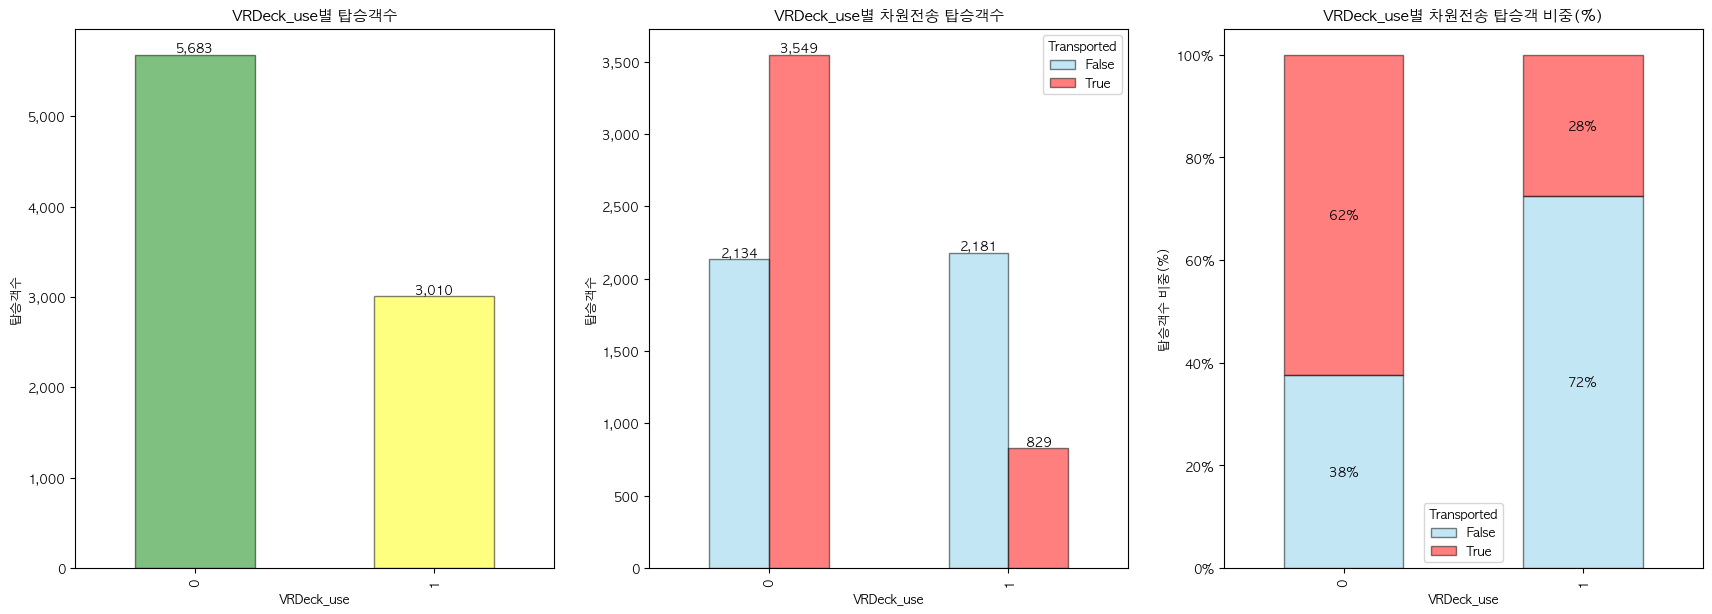

In [103]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["VRDeck_use"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["VRDeck_use"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["VRDeck_use"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="VRDeck_use별 탑승객수",
               xlabel="VRDeck_use",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="VRDeck_use별 차원전송 탑승객수",
                     xlabel="VRDeck_use",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="VRDeck_use별 차원전송 탑승객 비중(%)",
                       xlabel="VRDeck_use",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

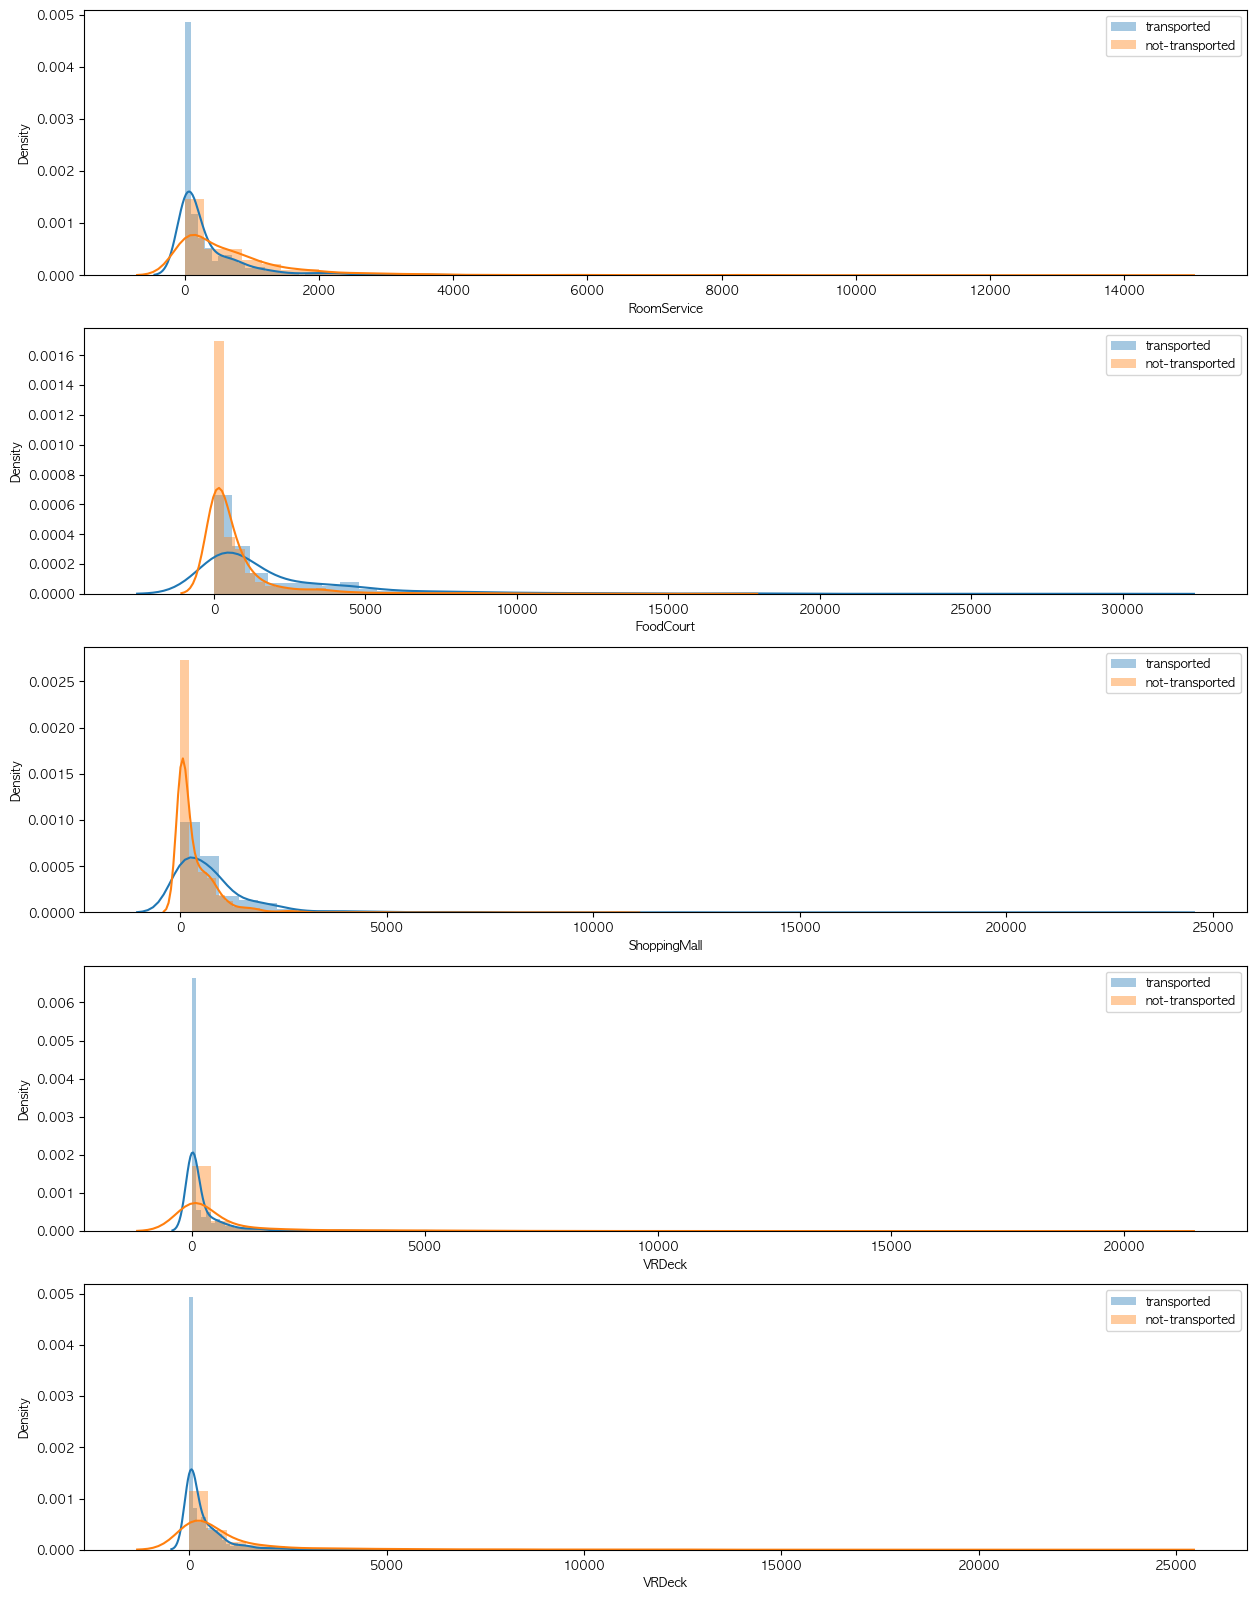

In [104]:
# 전체 분포 살펴보기
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 20))
sns.distplot(transported_df.loc[transported_df["RoomService_use"]==1, "RoomService"], ax=ax[0], label="transported") 
sns.distplot(not_transported_df.loc[not_transported_df["RoomService_use"]==1, "RoomService"], ax=ax[0], label="not-transported") 

sns.distplot(transported_df.loc[transported_df["FoodCourt_use"]==1, "FoodCourt"], ax=ax[1], label="transported") 
sns.distplot(not_transported_df.loc[not_transported_df["FoodCourt_use"]==1, "FoodCourt"], ax=ax[1], label="not-transported") 

sns.distplot(transported_df.loc[transported_df["ShoppingMall_use"]==1, "ShoppingMall"], ax=ax[2], label="transported") 
sns.distplot(not_transported_df.loc[not_transported_df["ShoppingMall_use"]==1, "ShoppingMall"], ax=ax[2], label="not-transported") 

sns.distplot(transported_df.loc[transported_df["Spa_use"]==1, "VRDeck"], ax=ax[3], label="transported") 
sns.distplot(not_transported_df.loc[not_transported_df["Spa_use"]==1, "VRDeck"], ax=ax[3], label="not-transported") 

sns.distplot(transported_df.loc[transported_df["VRDeck_use"]==1, "VRDeck"], ax=ax[4], label="transported") 
sns.distplot(not_transported_df.loc[not_transported_df["VRDeck_use"]==1, "VRDeck"], ax=ax[4], label="not-transported") 

# 보기 헷갈리니까 범주 달아주기
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.show()